<a href="https://colab.research.google.com/github/Hameon4/Tensorflow-2.0-Practice/blob/main/EBTIC_Advanced_AI_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
!wget https://raw.githubusercontent.com/Hameon4/Exfiltration-dataset/main/exfil_monogram.csv

--2022-07-26 04:44:02--  https://raw.githubusercontent.com/Hameon4/Exfiltration-dataset/main/exfil_monogram.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1660489 (1.6M) [text/plain]
Saving to: ‘exfil_monogram.csv’

exfil_monogram.csv  100%[===================>]   1.58M  --.-KB/s    in 0.06s   

2022-07-26 04:44:02 (26.5 MB/s) - ‘exfil_monogram.csv’ saved [1660489/1660489]



In [62]:
# Load in the data 
df = pd.read_csv('/content/exfil_monogram.csv')

In [63]:
df

,epoll_pwait,futex,getuid,ioctl,read,mprotect,write,clock_gettime,madvise,writev,...,personality,set_tls,capget,fstatfs64,getegid32,getgid32,getgroups32,ptrace,setsid,Label
0,248,102,295,187,36,29,115,12,104,37,...,0,0,0,0,0,0,0,0,0,0
1,423,217,393,253,104,31,317,13,17,38,...,0,0,0,0,0,0,0,0,0,0
2,31,18,58,83,4,1,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,31,20,60,85,4,2,9,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,31,19,64,96,4,2,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,61,103,0,35,48,12,70,1019,1,5,...,0,0,0,0,0,0,0,0,0,1
6137,2,33,1,1,3,15,2,0,2,0,...,0,0,0,0,0,0,0,0,0,1
6138,158,80,0,199,71,21,85,1146,4,10,...,0,0,0,0,0,0,0,0,0,1
6139,52,12,0,26,13,5,38,291,1,5,...,0,0,0,0,0,0,0,0,0,1


In [64]:
X = df.drop(columns = ['Label']).copy()
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#Validation SPlit
X_valid, X__sub_test, y_valid, y_sub_test = train_test_split(X_test,y_test, test_size=0.5)

In [65]:
D = df.shape

In [73]:
# 2 - Build/Instantiate the model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(120, 1)),
  tf.keras.layers.Conv1D(1, 70, 5),
  tf.keras.layers.MaxPool1D(),
  tf.keras.layers.Flatten(name='regions'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 11, 1)             71        
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 5, 1)             0         
 1D)                                                             
                                                                 
 regions (Flatten)           (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 2)                 12        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Train the model 
r = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10)

Epoch 1/10
154/154 [==============================] - 1s 4ms/step - loss: 64.9538 - accuracy: 0.6368 - val_loss: 13.2132 - val_accuracy: 0.7443
Epoch 2/10
154/154 [==============================] - 0s 2ms/step - loss: 8.3747 - accuracy: 0.7345 - val_loss: 4.7094 - val_accuracy: 0.7410
Epoch 3/10
154/154 [==============================] - 0s 3ms/step - loss: 3.7771 - accuracy: 0.7447 - val_loss: 2.0108 - val_accuracy: 0.7590
Epoch 4/10
154/154 [==============================] - 0s 3ms/step - loss: 1.6169 - accuracy: 0.7928 - val_loss: 1.1730 - val_accuracy: 0.8339
Epoch 5/10
154/154 [==============================] - 0s 3ms/step - loss: 1.1101 - accuracy: 0.8510 - val_loss: 1.1566 - val_accuracy: 0.8811
Epoch 6/10
154/154 [==============================] - 0s 3ms/step - loss: 1.0012 - accuracy: 0.8821 - val_loss: 0.8420 - val_accuracy: 0.8811
Epoch 7/10
154/154 [==============================] - 0s 3ms/step - loss: 0.7831 - accuracy: 0.8911 - val_loss: 0.6629 - val_accuracy: 0.8941
Epoc

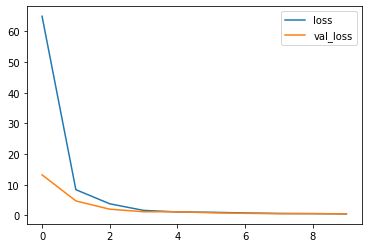

In [80]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

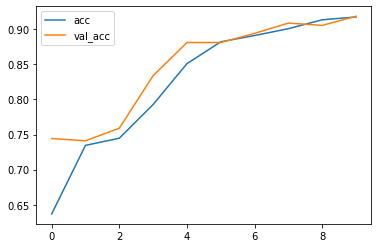

In [81]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [83]:
#  evaluate
print(model.evaluate(X_valid, y_valid))

20/20 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.9186
[0.502607524394989, 0.9185667634010315]


Confusion matrix, without normalization
[[320   0]
 [294   0]]


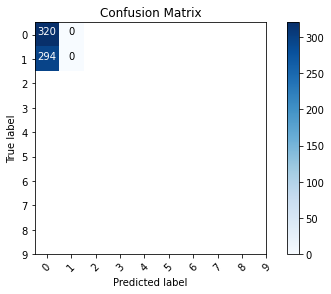

In [85]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np 
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(X_valid).argmax(axis=1)
cm = confusion_matrix(y_valid, p_test)
plot_confusion_matrix(cm, list(range(10)))